##### **Data Explorations**

Hal pertama yang dilakukan adalah mengimport librari umum untuk keperluan analisis.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

Memuat dataset menjadi dataframe.

In [2]:
# Load Data
or_df = pd.read_csv('/Users/tonisuhendar/One-Hour/learn-ds/dataset/online-retail-transactions/online_retail.csv')
or_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26 AM,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26 AM,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26 AM,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/11 12:50 PM,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/11 12:50 PM,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/11 12:50 PM,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/11 12:50 PM,4.15,12680.0,France


Menampilkan informasi terkait dataset.

In [3]:
# Get info
or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Melakukan pengecekan nilai yang hilang.

In [4]:
# Check Missing Values
or_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Membuat dataframe sebagai representasi nilai yang hilang dalam ukuran persentase supaya lebih mudah dipahami.

In [5]:
# Percentage of Missing Values
total_number_of_rows = len(or_df)
miss_description = or_df['Description'].isna().sum()
miss_customerid = or_df['CustomerID'].isna().sum()
miss_desc_cust = or_df.isna().any(axis=1).sum()

percent_miss_description = round(miss_description / total_number_of_rows * 100, 2)
percent_miss_customerid = round(miss_customerid / total_number_of_rows* 100, 2)
percent_miss_desc_cust = round(miss_desc_cust / total_number_of_rows* 100, 2)


missing_value = pd.DataFrame({'Count': [total_number_of_rows, miss_description, miss_customerid, miss_desc_cust],
                              'Percent': [100, percent_miss_description, percent_miss_customerid, percent_miss_desc_cust]},
                             index=['Total Rows', 'Description', 'Customer ID', 'Total Missing Values'])

missing_value['Percent'] = missing_value['Percent'].apply(lambda x: "{:.2f}%".format(x))

missing_value

,Count,Percent
Total Rows,541909,100.00%
Description,1454,0.27%
Customer ID,135080,24.93%
Total Missing Values,135080,24.93%


Menangani nilai yang ngilang pada variabel CustomerID dan Description dengan metode pengisian data.

In [6]:
# Handles Missing Values ​​from CustomerID by filling with 'Guest' values
or_df['CustomerID'].fillna(value=0, inplace=True)
or_df['CustomerID'] = or_df['CustomerID'].astype('int')
or_df['CustomerID'] = or_df['CustomerID'].replace(0, 'Guest')
or_df['CustomerID'] = or_df['CustomerID'].astype('str')

# Handles Missing Values ​​from Description by filling with 'No Descriptions' values
or_df['Description'].fillna(value='No Descriptions', inplace=True)

Memvalidasi hasil daripada penganganan nilai yang hilang.

In [7]:
# Percentage of Missing Values
total_number_of_rows = len(or_df)
miss_description = or_df['Description'].isna().sum()
miss_customerid = or_df['CustomerID'].isna().sum()
miss_desc_cust = or_df.isna().any(axis=1).sum()

percent_miss_description = round(miss_description / total_number_of_rows * 100, 2)
percent_miss_customerid = round(miss_customerid / total_number_of_rows* 100, 2)
percent_miss_desc_cust = round(miss_desc_cust / total_number_of_rows* 100, 2)


missing_value = pd.DataFrame({'Count': [total_number_of_rows, miss_description, miss_customerid, miss_desc_cust],
                              'Percent': [100, percent_miss_description, percent_miss_customerid, percent_miss_desc_cust]},
                             index=['Total Rows', 'Description', 'Customer ID', 'Total Missing Values'])

missing_value['Percent'] = missing_value['Percent'].apply(lambda x: "{:.2f}%".format(x))

missing_value

,Count,Percent
Total Rows,541909,100.00%
Description,0,0.00%
Customer ID,0,0.00%
Total Missing Values,0,0.00%


Melakukan pengecekan data duplikat.

In [8]:
# Check for Duplicate Data
or_df.duplicated().sum()

5268

Menampilkan data data yang duplikat.

In [9]:
# Duplicate Data
dup = or_df[or_df.duplicated(keep=False)]
dup

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/01/10 11:45 AM,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/01/10 11:45 AM,2.10,17908,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/01/10 11:45 AM,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/01/10 11:45 AM,1.25,17908,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/01/10 11:45 AM,2.95,17908,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/09/11 11:34 AM,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/09/11 11:34 AM,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/09/11 11:34 AM,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,12/09/11 11:34 AM,2.10,14446,United Kingdom


Menangadi data duplikat dengan menghapusnya.

In [10]:
# Drop Duplicate Data
or_df = or_df.drop_duplicates(keep='first')
or_df.duplicated().sum()

0

Menambahkan variabel TotalPrices pada dataframe.

In [11]:
# Add new column TotalPrices = Quantity * UnitPrice
or_df['TotalPrices'] = or_df['Quantity'] * or_df['UnitPrice']

# Re-order Feature
cl_df = or_df[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Country', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalPrices']]
cl_df = cl_df.reset_index(drop=True)
cl_df

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCode,Description,Quantity,UnitPrice,TotalPrices
0,536365,12/01/10 08:26 AM,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,12/01/10 08:26 AM,17850,United Kingdom,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,12/01/10 08:26 AM,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,12/01/10 08:26 AM,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,12/01/10 08:26 AM,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...
536636,581587,12/09/11 12:50 PM,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20
536637,581587,12/09/11 12:50 PM,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
536638,581587,12/09/11 12:50 PM,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
536639,581587,12/09/11 12:50 PM,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60


Melihat informasi data.

In [12]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   InvoiceDate  536641 non-null  object 
 2   CustomerID   536641 non-null  object 
 3   Country      536641 non-null  object 
 4   StockCode    536641 non-null  object 
 5   Description  536641 non-null  object 
 6   Quantity     536641 non-null  int64  
 7   UnitPrice    536641 non-null  float64
 8   TotalPrices  536641 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 36.8+ MB


Merubah tipe data pada variabel InvoiceDate.

In [13]:
# Change Dtype
cl_df['InvoiceDate'] = pd.to_datetime(cl_df['InvoiceDate'])
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   InvoiceDate  536641 non-null  datetime64[ns]
 2   CustomerID   536641 non-null  object        
 3   Country      536641 non-null  object        
 4   StockCode    536641 non-null  object        
 5   Description  536641 non-null  object        
 6   Quantity     536641 non-null  int64         
 7   UnitPrice    536641 non-null  float64       
 8   TotalPrices  536641 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.8+ MB


##### **Data Visualization**

Membuat visualisasi data berdasarkan pertanyaan umum

1. Negara mana yang memiliki transaksi terbanyak? 

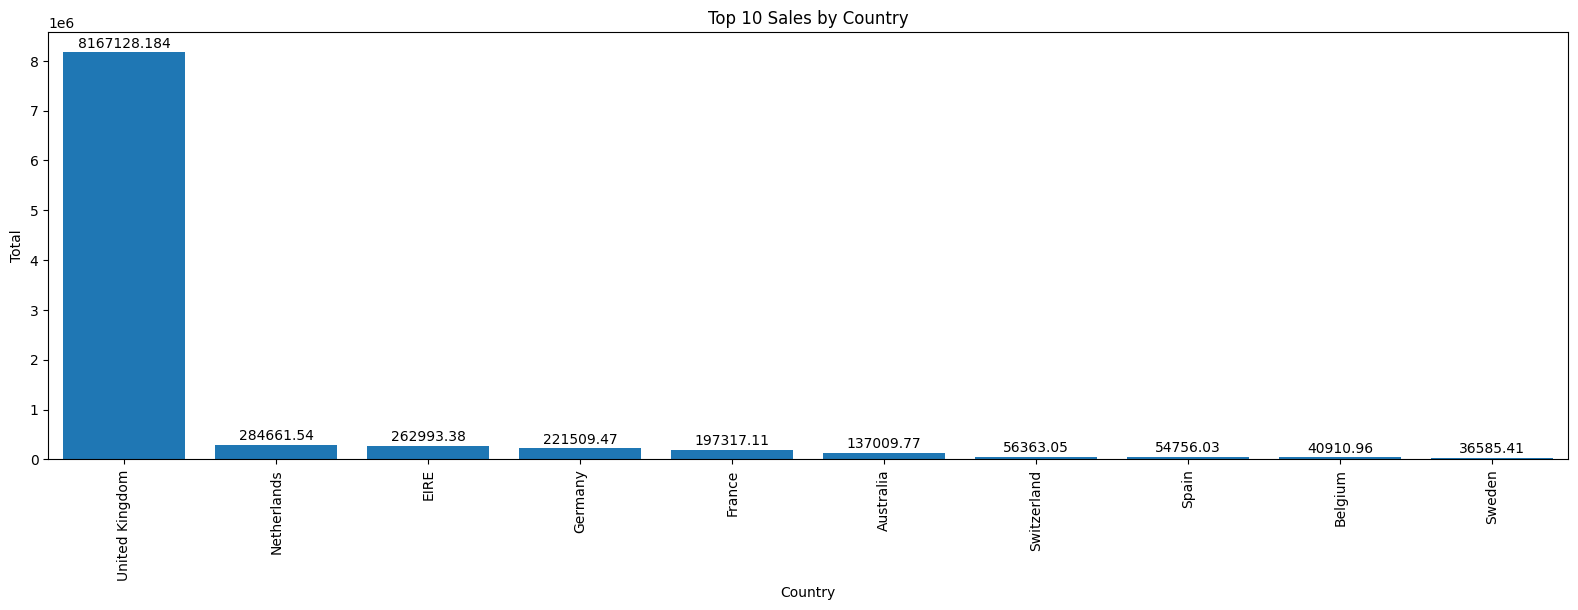

In [14]:
# Top 10 Sales by Country

sales_by_country = cl_df.groupby('Country')['TotalPrices'].sum().sort_values(ascending=False)
sales_by_country = sales_by_country.head(10)
 
ax = sales_by_country.plot.bar()

plt.bar(sales_by_country.index, sales_by_country.values)

ax.set_xlabel('Country')
ax.set_ylabel('Total')
ax.set_title('Top 10 Sales by Country')

# Add the count values to the bars
for i, v in enumerate(sales_by_country.values):
    ax.text(i, v + 100000, str(v), ha='center')
plt.subplots_adjust(right=2.5, top=1)

2. Produk apa yang paling laris?

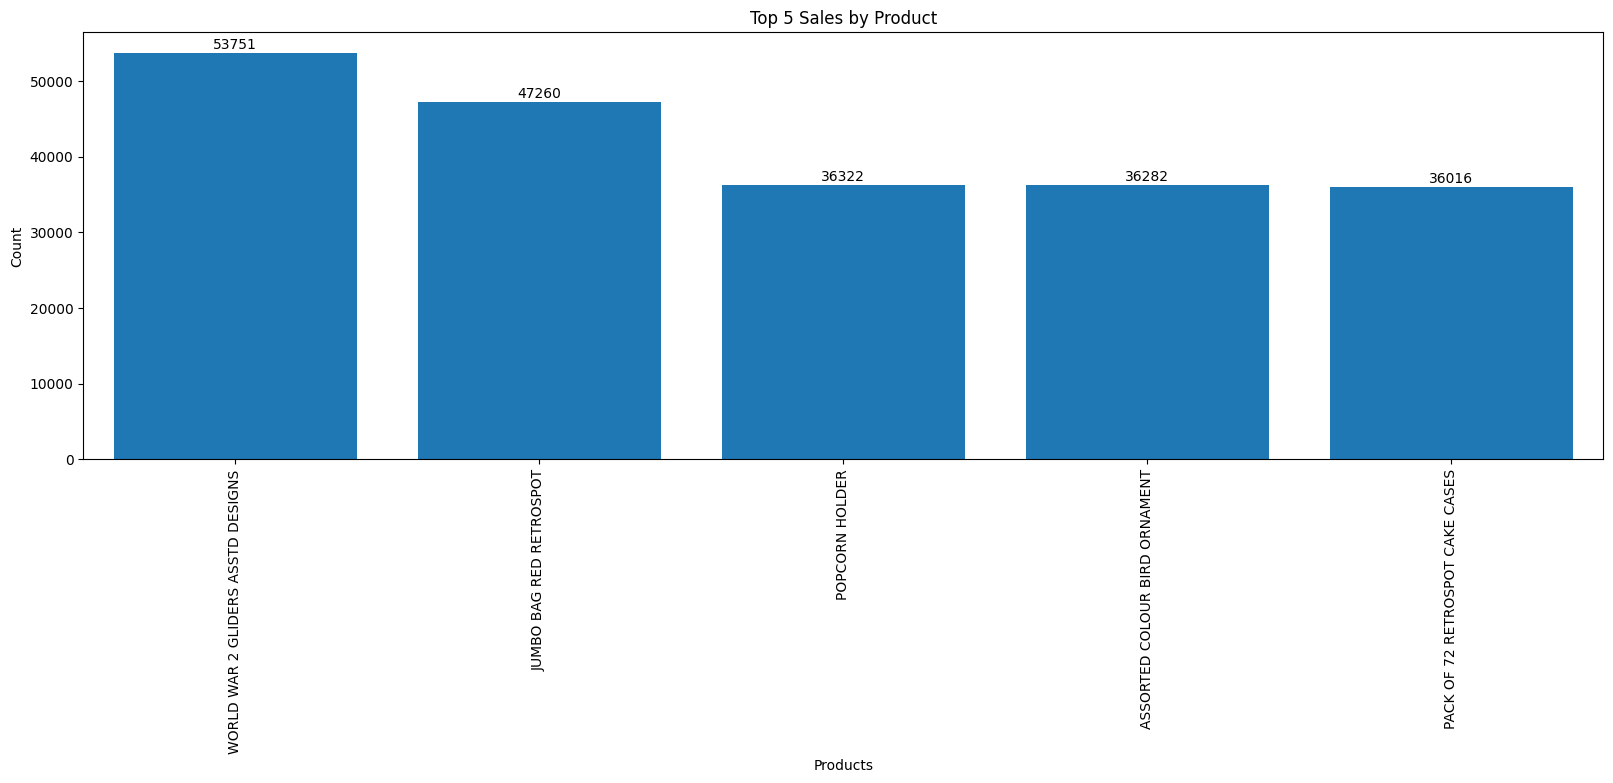

In [15]:
# Top 5 Sales by Product

sales_by_product = cl_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
sales_by_product = sales_by_product.head(5)
 
ax = sales_by_product.plot.bar()

plt.bar(sales_by_product.index, sales_by_product.values)

ax.set_xlabel('Products')
ax.set_ylabel('Count')
ax.set_title('Top 5 Sales by Product')

# Add the count values to the bars
for i, v in enumerate(sales_by_product.values):
    ax.text(i, v + 500, str(v), ha='center')
plt.subplots_adjust(right=2.5, top=1)


3. Pelanggan mana yang paling banyak berbelanja?

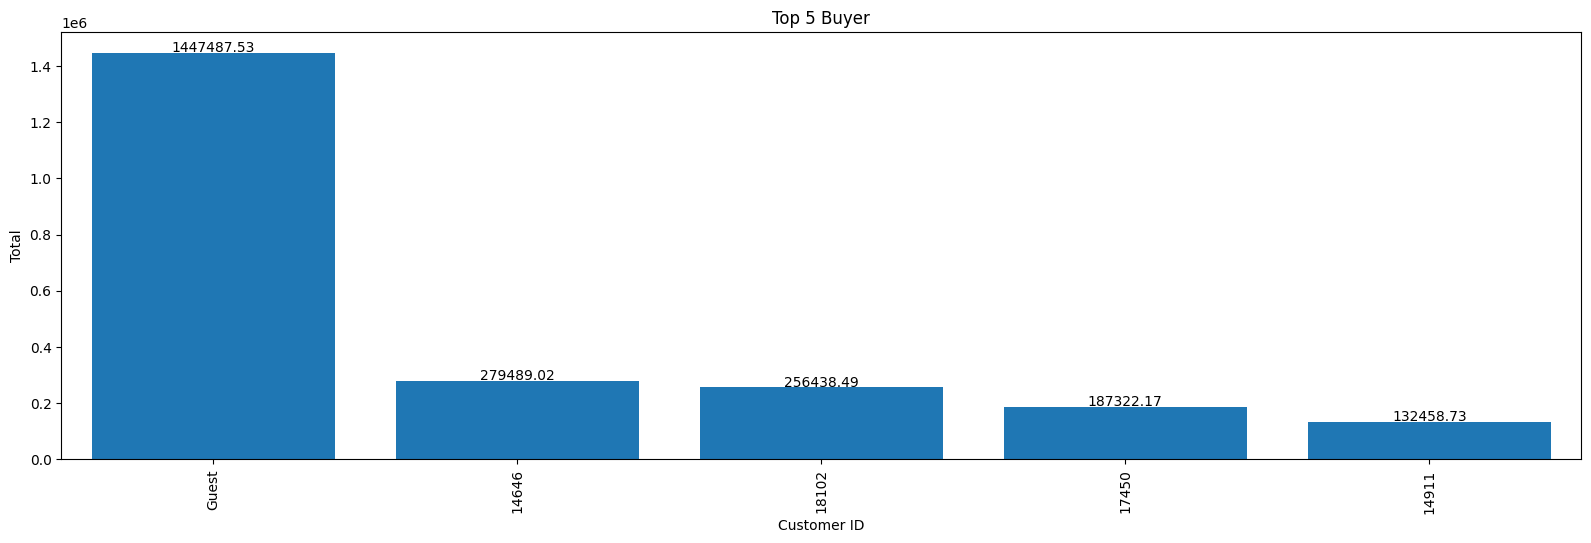

In [16]:
# Top 5 Buyer

monthly_data = cl_df.groupby('CustomerID')['TotalPrices'].sum().sort_values(ascending=False)
monthly_data = monthly_data.head(5)
 
ax = monthly_data.plot.bar()

plt.bar(monthly_data.index, monthly_data.values)

ax.set_xlabel('Customer ID')
ax.set_ylabel('Total')
ax.set_title('Top 5 Buyer')

# Add the count values to the bars
for i, v in enumerate(monthly_data.values):
    ax.text(i, v + 3000, str(v), ha='center')
plt.subplots_adjust(right=2.5, top=1)

4. Bagaimana siklus penjualan setiap bulannya?

/var/folders/ns/342r4y8j1ss3gs05mnjypws00000gn/T/ipykernel_82436/2350546138.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = cl_df.resample('M', on='InvoiceDate').sum()


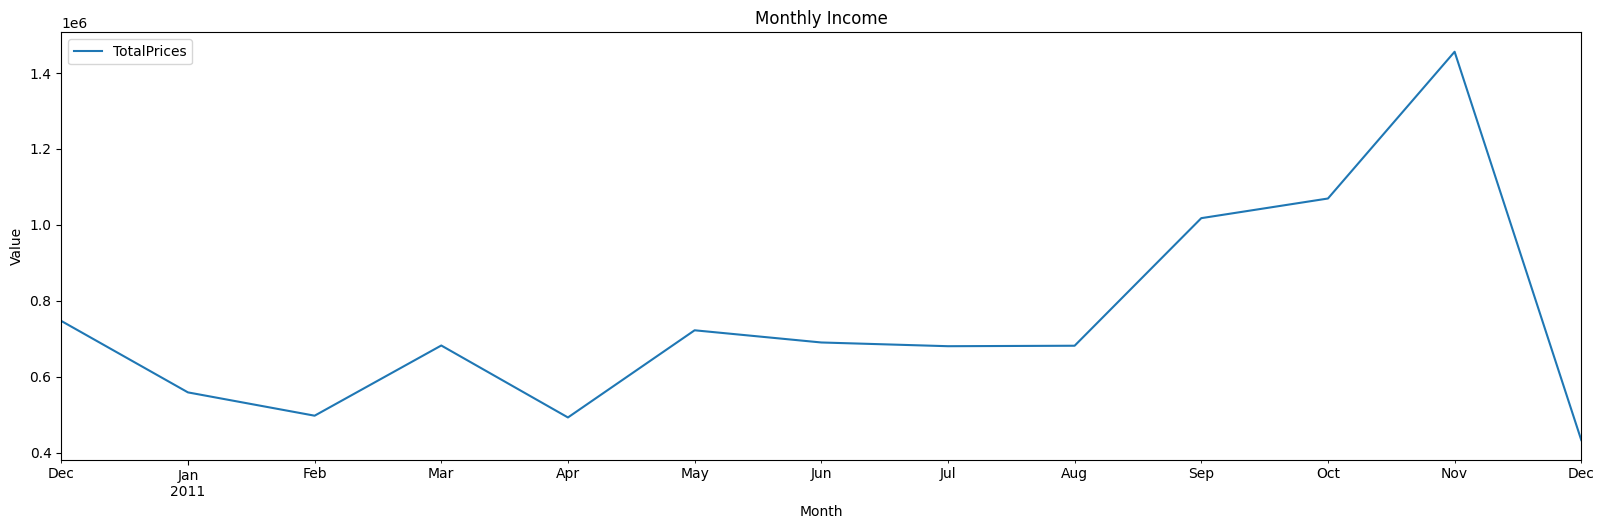

In [17]:
# Group the data by month and sum the Quantity and TotalPrices values for each month
monthly_data = cl_df.resample('M', on='InvoiceDate').sum()

# Create a line chart of the monthly Quantity and TotalPrices values
ax = monthly_data.plot(y=['TotalPrices'], kind='line')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('Monthly Income')

plt.subplots_adjust(right=2.5, top=1)

5. Berapa rata-rata siklus penjualan setiap harinya?

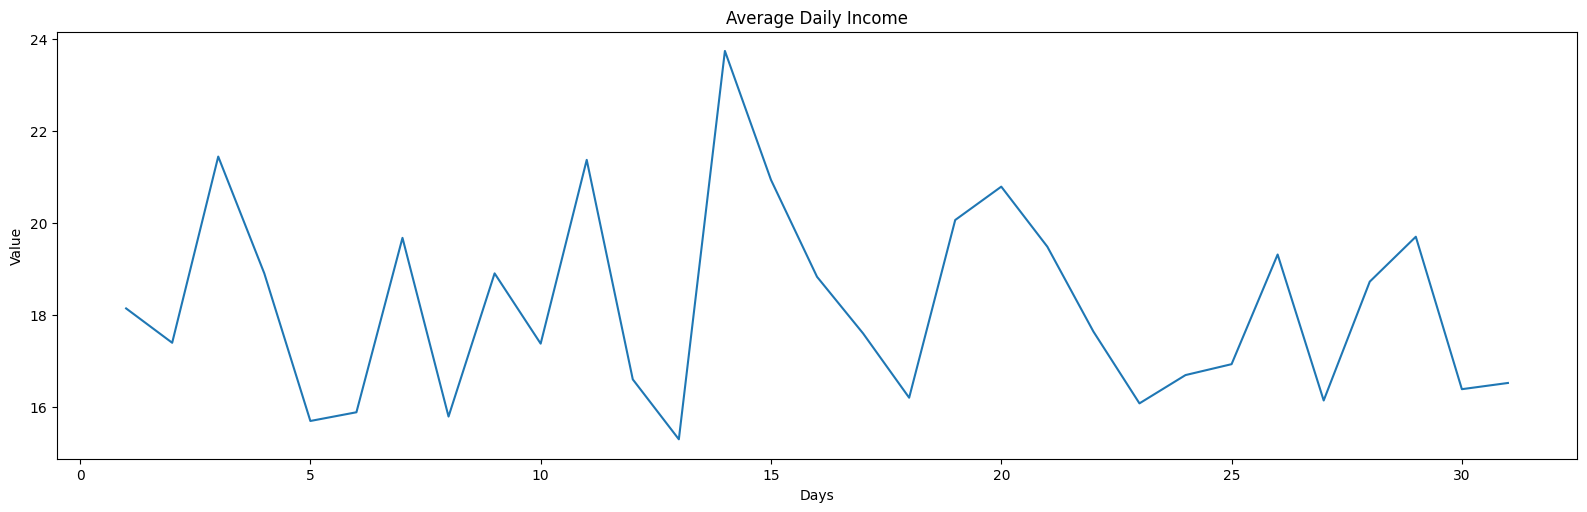

In [18]:
# Group the data by day and average the Quantity and TotalPrices values for each month
daily_data = cl_df.groupby(cl_df['InvoiceDate'].dt.day)['TotalPrices'].mean()

# Create a line chart of the monthly Quantity and TotalPrices values
ax = daily_data.plot(y=['TotalPrices'], kind='line')
ax.set_xlabel('Days')
ax.set_ylabel('Value')
ax.set_title('Average Daily Income')

plt.subplots_adjust(right=2.5, top=1)

6. Bagaimana trend penjualan harian dalam satu tahun?

In [19]:
import plotly.express as px

# Plot data by day and sum the 'Quantity' and 'TotalPrices' column
sumbyday_cl_df = cl_df.groupby(pd.Grouper(key='InvoiceDate', freq='D')).sum().reset_index()

# Create the plot
fig = px.line(sumbyday_cl_df, x='InvoiceDate', y=['TotalPrices'], title='Sum by Days - Total Prices')

# Add x-axis and y-axis labels
fig.update_layout(xaxis_title='Invoice Date', yaxis_title='Value')

trend_prices = np.polyfit(sumbyday_cl_df.index, sumbyday_cl_df['TotalPrices'], 1)

fig.add_scatter(x=sumbyday_cl_df['InvoiceDate'], y=np.polyval(trend_prices, sumbyday_cl_df.index), mode='lines', name='Total Prices Trend')

# Display the plot
fig.show()

/var/folders/ns/342r4y8j1ss3gs05mnjypws00000gn/T/ipykernel_82436/2962807195.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumbyday_cl_df = cl_df.groupby(pd.Grouper(key='InvoiceDate', freq='D')).sum().reset_index()


#### **Build Dataset For Modeling**

Membuat dataframe baru untuk kebutukan pemodelan.

In [20]:
dataset = cl_df[['InvoiceDate', 'TotalPrices']]
dataset

,InvoiceDate,TotalPrices
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
...,...,...
536636,2011-12-09 12:50:00,10.20
536637,2011-12-09 12:50:00,12.60
536638,2011-12-09 12:50:00,16.60
536639,2011-12-09 12:50:00,16.60


Melihat informasi data.

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  536641 non-null  datetime64[ns]
 1   TotalPrices  536641 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 MB


Melakukan visualisasi data untuk melihat hubungan antara variabel.

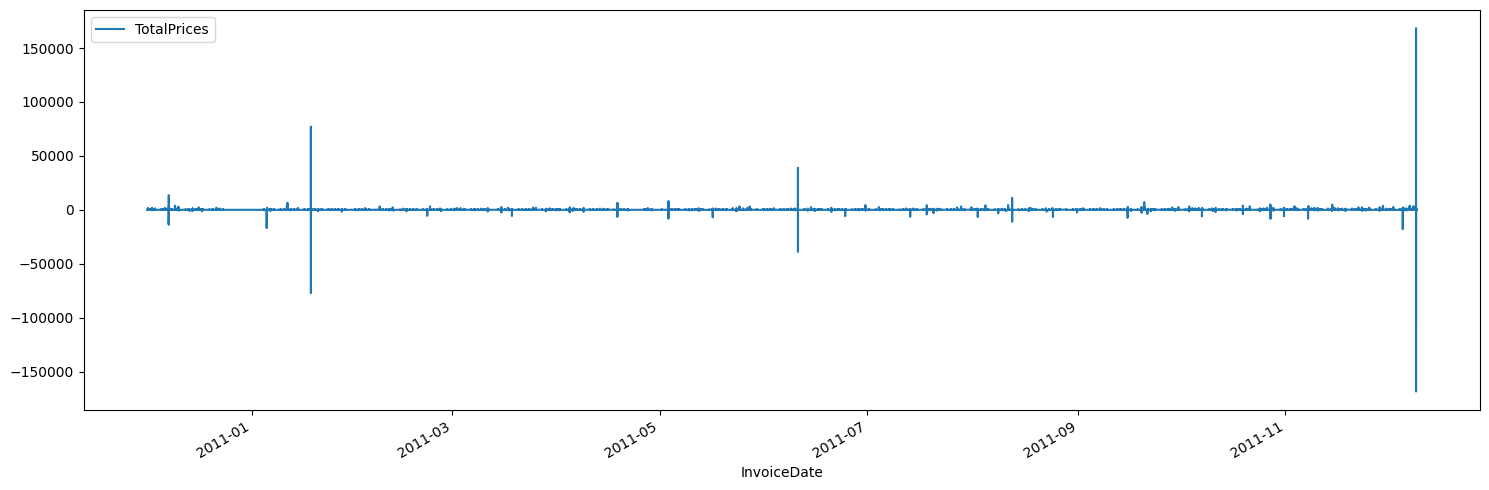

In [22]:
# Plot
fig, axs = plt.subplots(figsize=(15,5))
dataset.plot('InvoiceDate', 'TotalPrices', ax=axs)

plt.tight_layout()

Menampilkan ringkasan statistik deskriptif dari dataset.

In [23]:
dataset.describe()

,TotalPrices
count,536641.000000
mean,18.123861
std,380.656263
min,-168469.600000
25%,3.750000
50%,9.870000
75%,17.400000
max,168469.600000


Mendeteksi outliers dengan visualisasi BoxPlot.

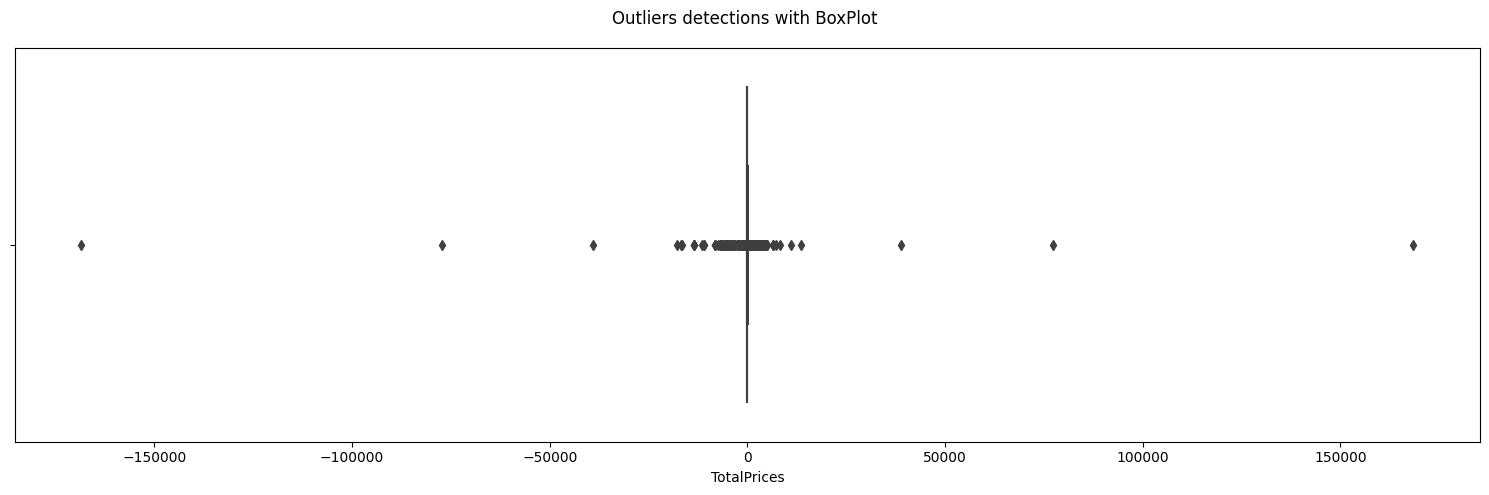

In [24]:
# Outlier Detection with BoxPlot
fig, axs = plt.subplots(figsize=(15, 5))

sns.boxplot(x=dataset['TotalPrices'], ax=axs)

fig.suptitle('Outliers detections with BoxPlot')
plt.tight_layout()

Melihat hasil minimum dan maksimun daripada metode IQR untuk menangasi outliers.

In [25]:
# Convert Dtype
dataset['InvoiceDate'] = dataset['InvoiceDate'].astype('str')

# Handling Outliers
Q1 = (dataset[['TotalPrices']]).quantile(0.25)
Q3 = (dataset[['TotalPrices']]).quantile(0.75)
IQR = Q3 - Q1

maximun = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

dataset_outlier = pd.DataFrame({'Minimum Value': minimum, 
                                'Maximum Value': maximun,}, 
                                index=['TotalPrices'])
dataset_outlier

,Minimum Value,Maximum Value
TotalPrices,-16.725,37.875


Menangani outliers dengan normalisasi data berdasarkan metode IQR.

In [26]:
more_than = (dataset > maximun)
lower_than = (dataset < minimum)

dataset = dataset.mask(more_than, maximun, axis=1)
dataset = dataset.mask(lower_than, minimum, axis=1)

/var/folders/ns/342r4y8j1ss3gs05mnjypws00000gn/T/ipykernel_82436/2309745465.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

/var/folders/ns/342r4y8j1ss3gs05mnjypws00000gn/T/ipykernel_82436/2309745465.py:2: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Memvalidasi persebaran data setelah menangani masalah outliers dengan metode IQR, visualisasi dengan BoxPlot.

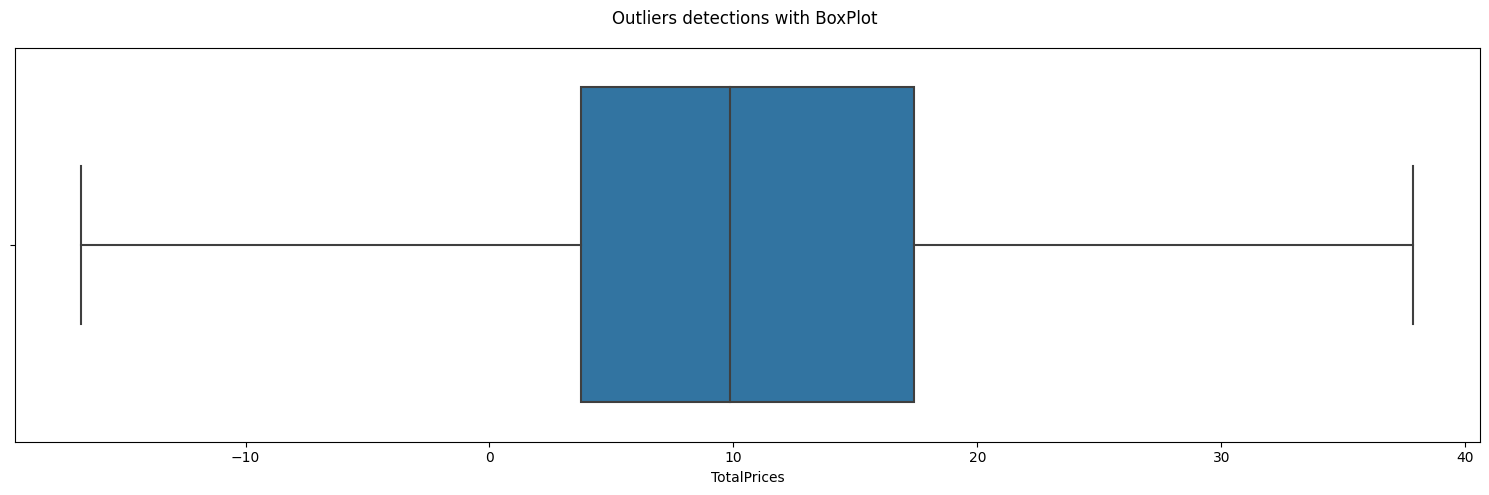

In [27]:
# Outlier Detection with BoxPlot
fig, axs = plt.subplots(figsize=(15, 5))
sns.boxplot(x=dataset['TotalPrices'], ax=axs)

fig.suptitle('Outliers detections with BoxPlot')
plt.tight_layout()

Memvisualisasikan persebaran dataset setelah di normalisasi.

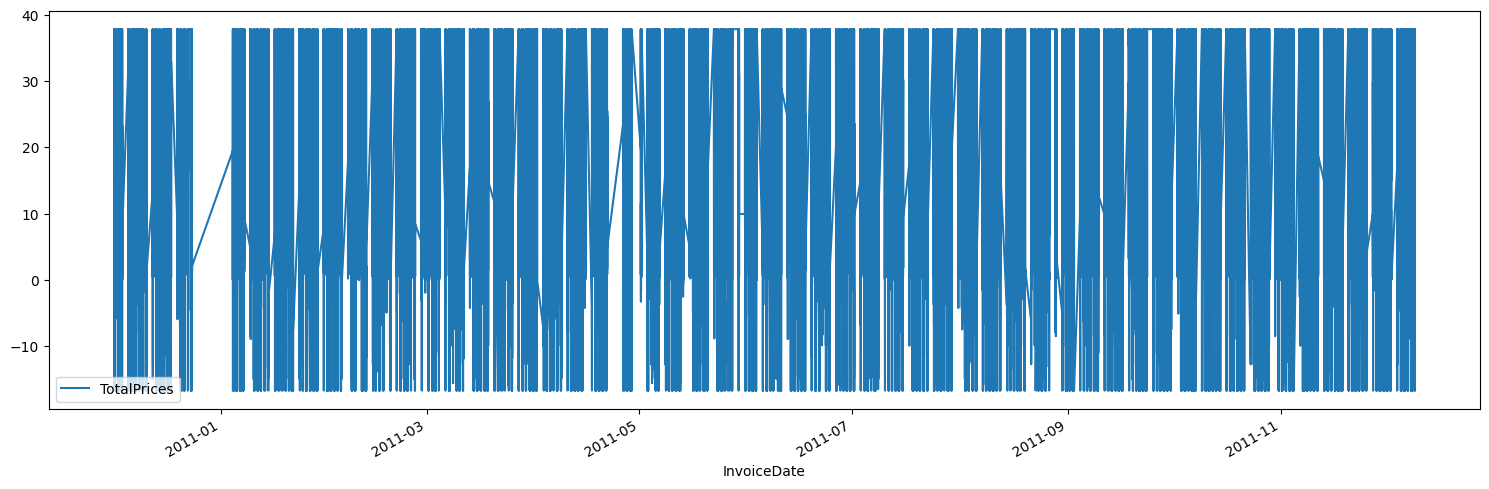

In [28]:
# Convert Dtype 
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

# Plot
fig, axs = plt.subplots(figsize=(15,5))
dataset.plot('InvoiceDate', 'TotalPrices', ax=axs)

plt.tight_layout()

Melakukan visualisasi data dengan plot garis untuk melihat grafik penjualan harian.

In [29]:
import plotly.express as px

# Plot data by day and sum the 'Quantity' and 'TotalPrices' column
sumbyday_dataset = dataset.groupby(pd.Grouper(key='InvoiceDate', freq='D')).sum().reset_index()

# Create the plot
fig = px.line(sumbyday_dataset, x='InvoiceDate', y=['TotalPrices'], title='Sum by Days - Total Prices')

# Add x-axis and y-axis labels
fig.update_layout(xaxis_title='Invoice Date', yaxis_title='Value')

# Display the plot
fig.show()

Melakukan visualisasi data dengan plot garis untuk melihat grafik penjualan bulanan.

In [30]:
import plotly.express as px

# Plot data by month and sum the 'Quantity' and 'TotalPrices' column
sumbymonth_dataset = dataset.groupby(pd.Grouper(key='InvoiceDate', freq='M')).sum().reset_index()

# Create the plot
fig = px.line(sumbymonth_dataset, x='InvoiceDate', y=['TotalPrices'], title='Sum by Month - Total Prices')

# Add x-axis and y-axis labels
fig.update_layout(xaxis_title='Invoice Date', yaxis_title='Value')

# Display the plot
fig.show()

Menampilkan dataframe yang sudah dikalkulasikan berdasarkan data harian.

In [31]:
sumbyday_dataset

,InvoiceDate,TotalPrices
0,2010-12-01,37203.405
1,2010-12-02,30136.105
2,2010-12-03,28005.430
3,2010-12-04,0.000
4,2010-12-05,24857.235
...,...,...
369,2011-12-05,60780.610
370,2011-12-06,34729.680
371,2011-12-07,36071.930
372,2011-12-08,50208.780


Melakukan ektrasi fitur waktu untuk kebutuhan pemodelan supaya analisis bisa lebih detail.

In [32]:
# Extract InvoiceDate Features
dataset['day'] = dataset['InvoiceDate'].dt.day
dataset['month'] = dataset['InvoiceDate'].dt.month
dataset['year'] = dataset['InvoiceDate'].dt.year
dataset['dayofweek'] = dataset['InvoiceDate'].dt.dayofweek
dataset['quarter'] = dataset['InvoiceDate'].dt.quarter
dataset['weekday'] = dataset['dayofweek'] < 5

dataset

,InvoiceDate,TotalPrices,day,month,year,dayofweek,quarter,weekday
0,2010-12-01 08:26:00,15.30,1,12,2010,2,4,True
1,2010-12-01 08:26:00,20.34,1,12,2010,2,4,True
2,2010-12-01 08:26:00,22.00,1,12,2010,2,4,True
3,2010-12-01 08:26:00,20.34,1,12,2010,2,4,True
4,2010-12-01 08:26:00,20.34,1,12,2010,2,4,True
...,...,...,...,...,...,...,...,...
536636,2011-12-09 12:50:00,10.20,9,12,2011,4,4,True
536637,2011-12-09 12:50:00,12.60,9,12,2011,4,4,True
536638,2011-12-09 12:50:00,16.60,9,12,2011,4,4,True
536639,2011-12-09 12:50:00,16.60,9,12,2011,4,4,True


Melihat informasi data.

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  536641 non-null  datetime64[ns]
 1   TotalPrices  536641 non-null  float64       
 2   day          536641 non-null  int64         
 3   month        536641 non-null  int64         
 4   year         536641 non-null  int64         
 5   dayofweek    536641 non-null  int64         
 6   quarter      536641 non-null  int64         
 7   weekday      536641 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5)
memory usage: 29.2 MB


#### **Modeling**

Tahap pemodelan, pertama mengimport librari yang dibutuhkan, menentukan nilai X dan y, menerapkan metode normalisasi data pada variabel y yaitu dengan MinMaxScaler, membagi data dengan metode TimeSeriesSplit, melakukan pengujian terhadap model.

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define X and y
X = dataset[['day', 'month', 'year', 'dayofweek', 'quarter', 'weekday']].values
y = dataset['TotalPrices'].values

# Initialize scaler
scaler = MinMaxScaler()

X = X
y = scaler.fit_transform(y.reshape(-1, 1))

# Data Splitting
tscv = TimeSeriesSplit(n_splits=5)

# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()

# Perform Time Series Cross Validation
mae_linear_reg = []
mae_decision_tree = []
mse_linear_reg = []
mse_decision_tree = []
rmse_linear_reg = []
rmse_decision_tree = []


for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train and predict using Linear Regression
    linear_reg.fit(X_train, y_train)
    y_pred_linear_reg = linear_reg.predict(X_test)
    mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
    rmse_linear_reg = np.sqrt(mse_linear_reg)
    mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)

    # Train and predict using Decision Tree
    decision_tree.fit(X_train, y_train)
    y_pred_decision_tree = decision_tree.predict(X_test)
    mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
    rmse_decision_tree = np.sqrt(mse_decision_tree)
    mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)

print("MSE (Linear Regression): {:.3f}".format(mse_linear_reg))
print("RMSE (Linear Regression) {:.3f}".format(rmse_linear_reg))
print("MAE (Linear Regression): {:.3f}".format(mae_linear_reg))

print("MSE (Decision Tree): {:.3f}".format(mse_decision_tree))
print("RMSE (Decision Tree): {:.3f}".format(rmse_decision_tree))
print("MAE (Decision Tree): {:.3f}".format(mae_decision_tree))

TRAIN: [    0     1     2 ... 89438 89439 89440] TEST: [ 89441  89442  89443 ... 178878 178879 178880]
TRAIN: [     0      1      2 ... 178878 178879 178880] TEST: [178881 178882 178883 ... 268318 268319 268320]
TRAIN: [     0      1      2 ... 268318 268319 268320] TEST: [268321 268322 268323 ... 357758 357759 357760]
TRAIN: [     0      1      2 ... 357758 357759 357760] TEST: [357761 357762 357763 ... 447198 447199 447200]
TRAIN: [     0      1      2 ... 447198 447199 447200] TEST: [447201 447202 447203 ... 536638 536639 536640]
MSE (Linear Regression): 0.042
RMSE (Linear Regression) 0.204
MAE (Linear Regression): 0.168
MSE (Decision Tree): 0.043
RMSE (Decision Tree): 0.207
MAE (Decision Tree): 0.169


#### **Evaluation**

Evaluasi dalam konteks pemodelan atau machine learning adalah proses mengevaluasi kinerja suatu model atau algoritma berdasarkan data yang telah dikumpulkan atau diuji.
Membuat dataframe untuk hasil pengujian model yang tekah dievaluasi metrik supaya lebih mudah di pahami.

In [35]:
metrics_df = pd.DataFrame({
    'Linear Regression': [mse_linear_reg, rmse_linear_reg, mae_linear_reg],
    'Decision Tree': [mse_decision_tree, rmse_decision_tree, mae_decision_tree],
}, index=['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)'])
metrics_df['Linear Regression'] = metrics_df['Linear Regression'].round(3)
metrics_df['Decision Tree'] = metrics_df['Decision Tree'].round(3)
metrics_df

,Linear Regression,Decision Tree
Mean Squared Error (MSE),0.042,0.043
Root Mean Squared Error (RMSE),0.204,0.207
Mean Absolute Error (MAE),0.168,0.169


Membuat visualisasi model supaya lebih mudah dipahami.

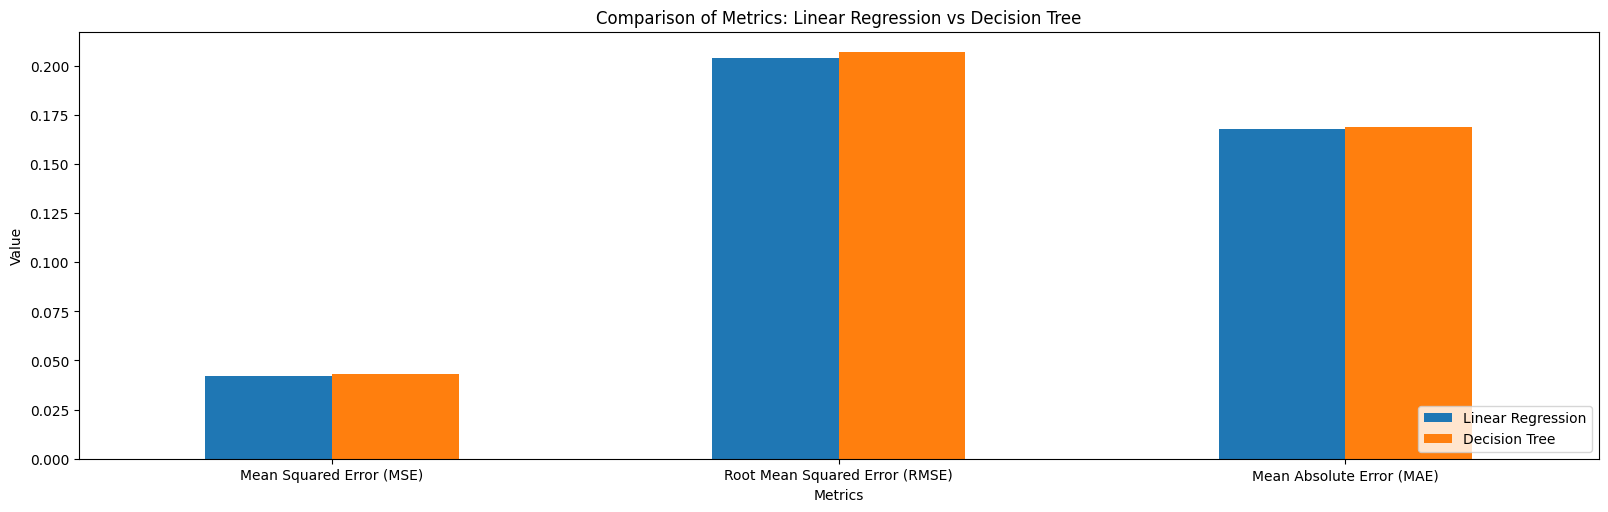

In [36]:
import matplotlib.pyplot as plt

metrics_df.plot.bar(rot=0)
plt.subplots_adjust(right=2.5, top=1)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Metrics: Linear Regression vs Decision Tree')
plt.legend(loc='lower right')
plt.show()